# Benin Solar Farm Analysis
## Exploratory Data Analysis for MoonLight Energy Solutions

### Objectives:
1. Profile and clean the Benin solar dataset
2. Identify patterns in solar radiation and weather variables  
3. Analyze cleaning impact on solar panel efficiency
4. Provide data-driven recommendations for solar investment

1) Imports & Configuration 

In [8]:
# Core data analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Statistics
import scipy.stats as stats
from scipy import stats as scipy_stats
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Advanced visualization
from windrose import WindroseAxes
import matplotlib.cm as cm

# Configuration for professional plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

print(" All libraries imported successfully!")
print(" Professional configuration applied!")

 All libraries imported successfully!
 Professional configuration applied!


2) Load Data & First Observe

In [9]:
# Load Benin dataset
print(" Loading Benin solar dataset...")
df = pd.read_csv('../data/benin-malanville.csv')

print("="*60)
print("DATASET OVERVIEW")
print("="*60)
print(f" Dataset Shape: {df.shape}")
print(f" Date Range: {df['Timestamp'].min()} to {df['Timestamp'].max()}")

print("\n First 5 rows:")
display(df.head())

print("\n Column Information:")
print(df.info())

print("\n Key Variables Overview:")
key_vars = ['GHI', 'DNI', 'DHI', 'Tamb', 'RH', 'WS', 'BP', 'Cleaning']
for var in key_vars:
    if var in df.columns:
        print(f"   {var}: {df[var].dtype} | Non-null: {df[var].count()}/{len(df)}")

 Loading Benin solar dataset...
DATASET OVERVIEW
 Dataset Shape: (525600, 19)
 Date Range: 2021-08-09 00:01 to 2022-08-09 00:00

 First 5 rows:


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN



 Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB  

3) Parse Timestamps & Set Index 

In [10]:
print("🕐 Processing timestamps...")

# Convert to datetime and set as index
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.set_index('Timestamp', inplace=True)

# Create time-based features for analysis
df['Hour'] = df.index.hour
df['Month'] = df.index.month
df['DayOfWeek'] = df.index.dayofweek
df['Season'] = df.index.month % 12 // 3 + 1  # 1:Winter, 2:Spring, 3:Summer, 4:Fall

print("✅ Timestamp processing completed!")
print(f"📅 Final date range: {df.index.min()} to {df.index.max()}")
print(f"🕐 Total duration: {(df.index.max() - df.index.min()).days} days")

🕐 Processing timestamps...
✅ Timestamp processing completed!
📅 Final date range: 2021-08-09 00:01:00 to 2022-08-09 00:00:00
🕐 Total duration: 364 days


4) Summary Statistics & Missing-Value Report 

In [11]:
print("="*60)
print("SUMMARY STATISTICS & MISSING VALUE ANALYSIS")
print("="*60)

# Summary statistics for all numeric columns
print("📈 Summary Statistics (Numeric Columns):")
numeric_stats = df.describe()
display(numeric_stats)

# Missing value analysis
print("\n❓ Missing Values Analysis:")
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100

missing_report = pd.DataFrame({
    'Missing_Count': missing_data,
    'Missing_Percentage': missing_percent
}).sort_values('Missing_Percentage', ascending=False)

# Display only columns with missing values
missing_columns = missing_report[missing_report['Missing_Count'] > 0]
if not missing_columns.empty:
    print("Columns with missing values:")
    display(missing_columns)
else:
    print("✅ No missing values found!")

# Identify columns with >5% missing values
high_missing = missing_report[missing_report['Missing_Percentage'] > 5]
if not high_missing.empty:
    print("⚠️ CRITICAL: Columns with >5% missing values:")
    display(high_missing)
else:
    print("✅ No columns exceed 5% missing threshold")

# Data types overview
print("\n📊 Data Types Summary:")
dtype_summary = pd.DataFrame(df.dtypes.value_counts()).T
display(dtype_summary)

SUMMARY STATISTICS & MISSING VALUE ANALYSIS
📈 Summary Statistics (Numeric Columns):


,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments,Hour,Month,DayOfWeek,Season
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0,525600.000000,525600.000000,525600.000000,525600.000000
mean,240.559452,167.187516,115.358961,236.589496,228.883576,28.179683,54.487969,2.121113,2.809195,0.473390,153.435172,8.582407,994.197199,0.000923,0.001905,35.246026,32.471736,NaN,11.500000,6.526027,2.991783,2.504110
std,331.131327,261.710501,158.691074,326.894859,316.536515,5.924297,28.073069,1.603466,2.029120,0.273395,102.332842,6.385864,2.474993,0.030363,0.037115,14.807258,12.348743,NaN,6.922193,3.447855,2.003404,1.114346
min,-12.900000,-7.800000,-12.600000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000,NaN,0.000000,1.000000,0.000000,1.000000
25%,-2.000000,-0.500000,-2.100000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,59.000000,3.700000,993.000000,0.000000,0.000000,24.200000,23.600000,NaN,5.750000,4.000000,1.000000,2.000000
50%,1.800000,-0.100000,1.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,0.500000,181.000000,8.600000,994.000000,0.000000,0.000000,30.000000,28.900000,NaN,11.500000,7.000000,3.000000,3.000000
75%,483.400000,314.200000,216.300000,463.700000,447.900000,32.300000,80.100000,3.100000,4.100000,0.600000,235.100000,12.300000,996.000000,0.000000,0.000000,46.900000,41.500000,NaN,17.250000,10.000000,5.000000,3.000000
max,1413.000000,952.300000,759.200000,1342.300000,1342.300000,43.800000,100.000000,19.500000,26.600000,4.200000,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000,NaN,23.000000,12.000000,6.000000,4.000000



❓ Missing Values Analysis:
Columns with missing values:


,Missing_Count,Missing_Percentage
Comments,525600,100.0


⚠️ CRITICAL: Columns with >5% missing values:


,Missing_Count,Missing_Percentage
Comments,525600,100.0



📊 Data Types Summary:


,float64,int32,int64
count,16,4,2


5)Outlier Detection (Z-scores) 

OUTLIER DETECTION USING Z-SCORES
🔍 Calculating Z-scores for key columns (|Z| > 3):


,Column,Total_Values,Outliers_Count,Outlier_Percentage,Severity
0,GHI,525600,89,0.02%,LOW
1,DNI,525600,0,0.00%,LOW
2,DHI,525600,3738,0.71%,LOW
3,ModA,525600,27,0.01%,LOW
4,ModB,525600,63,0.01%,LOW
5,WS,525600,3109,0.59%,LOW
6,WSgust,525600,3500,0.67%,LOW



📊 Outlier Summary:
Total outliers detected: 10526

📈 Visualizing Outliers (Boxplots):


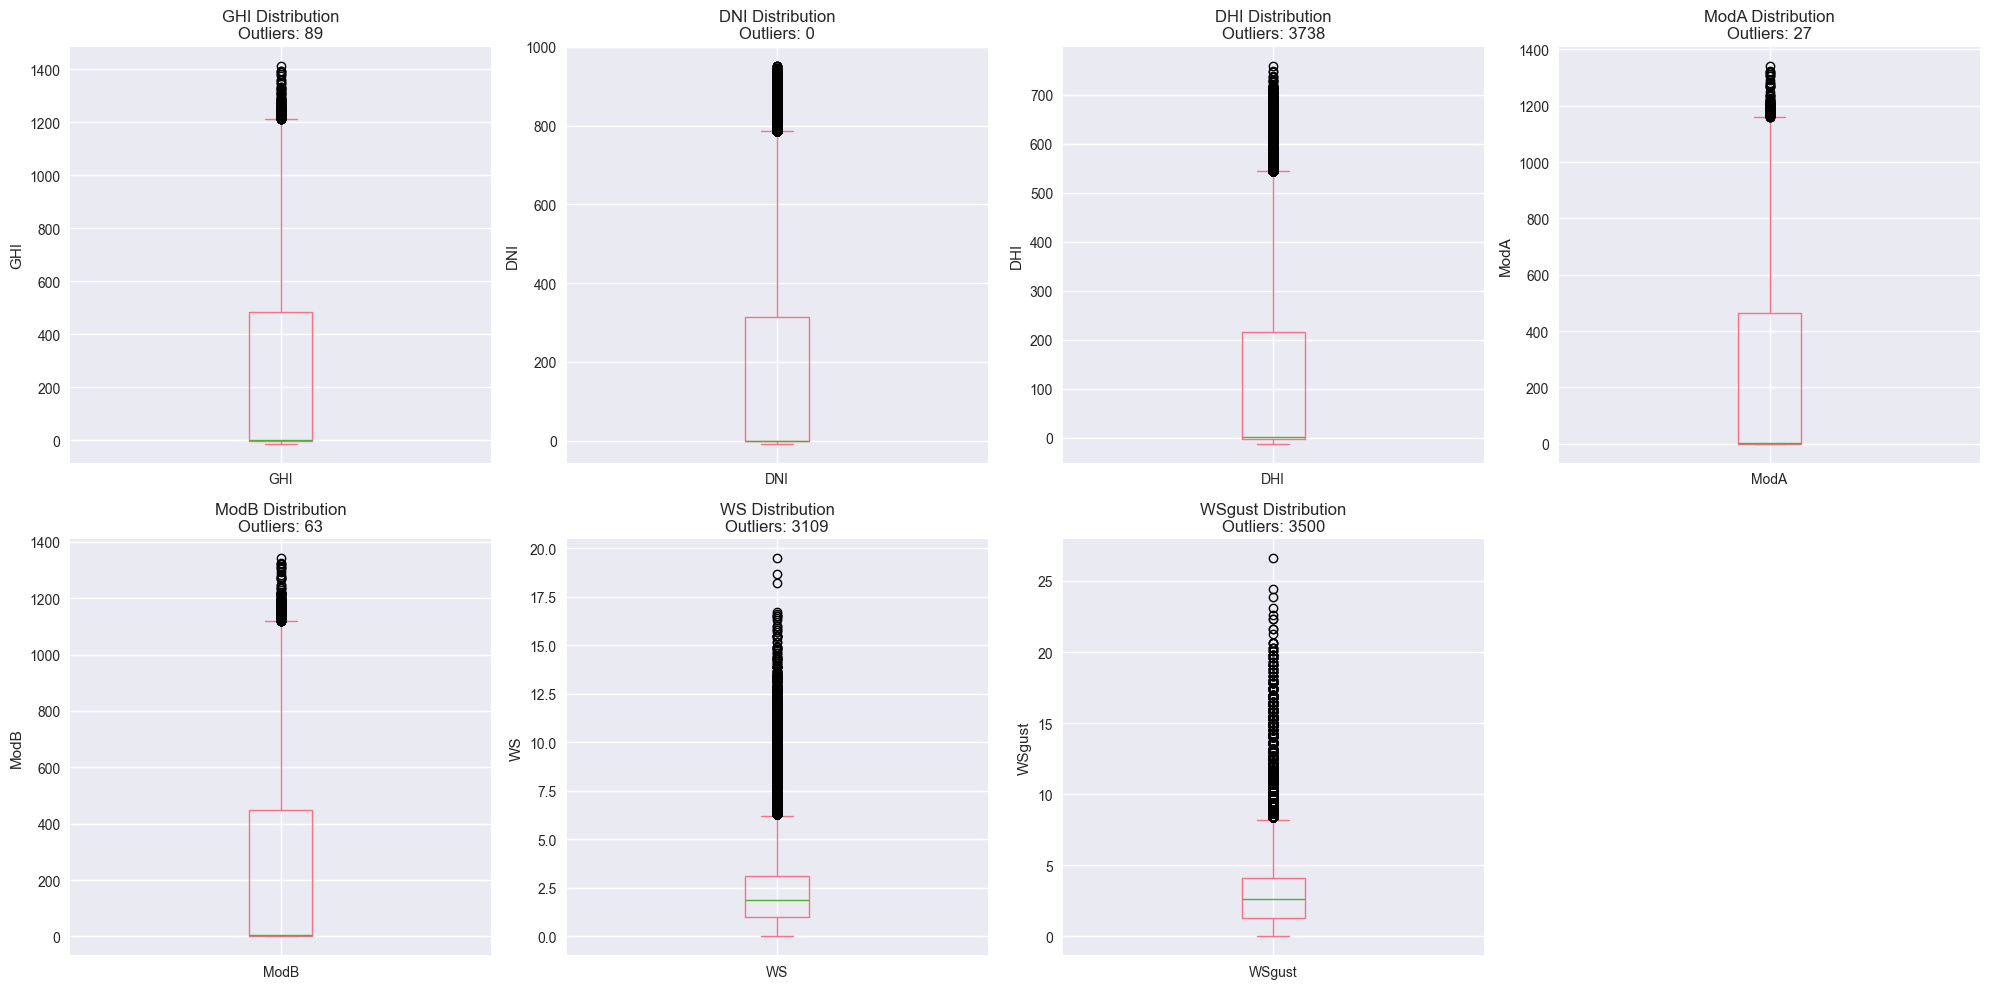

In [12]:
print("="*60)
print("OUTLIER DETECTION USING Z-SCORES")
print("="*60)

# Key columns for outlier analysis as specified in requirements
key_columns = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
outlier_report = []

print("🔍 Calculating Z-scores for key columns (|Z| > 3):")
for col in key_columns:
    if col in df.columns:
        # Calculate Z-scores (ignore NaN)
        z_scores = np.abs(stats.zscore(df[col].dropna()))
        outliers = len(z_scores[z_scores > 3])
        total_non_null = len(df[col].dropna())
        outlier_percent = (outliers / total_non_null) * 100 if total_non_null > 0 else 0
        
        outlier_report.append({
            'Column': col,
            'Total_Values': total_non_null,
            'Outliers_Count': outliers,
            'Outlier_Percentage': f"{outlier_percent:.2f}%",
            'Severity': 'HIGH' if outlier_percent > 5 else 'LOW'
        })

# Create comprehensive outlier report
outlier_df = pd.DataFrame(outlier_report)
display(outlier_df)

print("\n📊 Outlier Summary:")
total_outliers = outlier_df['Outliers_Count'].sum()
print(f"Total outliers detected: {total_outliers}")
high_severity = outlier_df[outlier_df['Severity'] == 'HIGH']
if not high_severity.empty:
    print("🚨 High severity outlier columns:")
    display(high_severity[['Column', 'Outlier_Percentage']])

# Visualize outliers with boxplots
print("\n📈 Visualizing Outliers (Boxplots):")
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.ravel()

for i, col in enumerate(key_columns):
    if i < len(axes) and col in df.columns:
        df[col].plot(kind='box', ax=axes[i], title=f'{col} Distribution\nOutliers: {outlier_df[outlier_df["Column"]==col]["Outliers_Count"].values[0]}')
        axes[i].set_ylabel(col)

# Remove empty subplots
for i in range(len(key_columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

6) Data Cleaning - Missing Values & Outliers

In [13]:
print("="*60)
print("DATA CLEANING PROCESS")
print("="*60)

# Create a clean copy of the dataset
df_clean = df.copy()
original_rows = len(df_clean)

print("🧹 Step 1: Handling Missing Values")
print("-----------------------------------")

# Impute missing values with median for key numeric columns
key_numeric_cols = ['GHI', 'DNI', 'DHI', 'Tamb', 'RH', 'WS', 'WSgust', 'BP', 'TModA', 'TModB']

imputation_report = []
for col in key_numeric_cols:
    if col in df_clean.columns:
        missing_before = df_clean[col].isnull().sum()
        if missing_before > 0:
            df_clean[col].fillna(df_clean[col].median(), inplace=True)
            missing_after = df_clean[col].isnull().sum()
            imputation_report.append({
                'Column': col,
                'Missing_Before': missing_before,
                'Missing_After': missing_after,
                'Imputation_Method': 'Median'
            })

if imputation_report:
    imputation_df = pd.DataFrame(imputation_report)
    print("✅ Missing values imputed:")
    display(imputation_df)
else:
    print("✅ No missing values needed imputation")

print("\n🧹 Step 2: Handling Outliers (Z-score > 3)")
print("-------------------------------------------")

# Remove outliers using Z-score method
rows_before_outliers = len(df_clean)
outlier_removal_report = []

for col in key_columns:
    if col in df_clean.columns:
        z_scores = np.abs(stats.zscore(df_clean[col]))
        outliers_before = len(z_scores[z_scores > 3])
        df_clean = df_clean[z_scores < 3]
        outliers_after = len(np.abs(stats.zscore(df_clean[col])) > 3) if len(df_clean) > 0 else 0
        
        outlier_removal_report.append({
            'Column': col,
            'Outliers_Removed': outliers_before,
            'Rows_After_Cleaning': len(df_clean)
        })

rows_after_outliers = len(df_clean)
outliers_removed = rows_before_outliers - rows_after_outliers

print(f"📊 Outlier Removal Summary:")
print(f"   Rows before outlier removal: {rows_before_outliers}")
print(f"   Rows after outlier removal: {rows_after_outliers}")
print(f"   Total rows removed: {outliers_removed}")
print(f"   Data retention: {(rows_after_outliers/original_rows)*100:.2f}%")

# Final data quality check
print("\n✅ Final Data Quality Check:")
print(f"   Total rows in cleaned dataset: {len(df_clean)}")
print(f"   Missing values in cleaned data: {df_clean.isnull().sum().sum()}")

# Export cleaned data
df_clean.to_csv('../data/benin_clean.csv', index=True)
print(f"\n💾 CLEANED DATA EXPORTED: data/benin_clean.csv")
print("   Note: Data folder is in .gitignore - CSV files won't be committed")

DATA CLEANING PROCESS
🧹 Step 1: Handling Missing Values
-----------------------------------
✅ No missing values needed imputation

🧹 Step 2: Handling Outliers (Z-score > 3)
-------------------------------------------
📊 Outlier Removal Summary:
   Rows before outlier removal: 525600
   Rows after outlier removal: 517232
   Total rows removed: 8368
   Data retention: 98.41%

✅ Final Data Quality Check:
   Total rows in cleaned dataset: 517232
   Missing values in cleaned data: 517232

💾 CLEANED DATA EXPORTED: data/benin_clean.csv
   Note: Data folder is in .gitignore - CSV files won't be committed


7) Time Series Analysis

TIME SERIES ANALYSIS
📈 Analyzing temporal patterns in solar radiation and temperature...


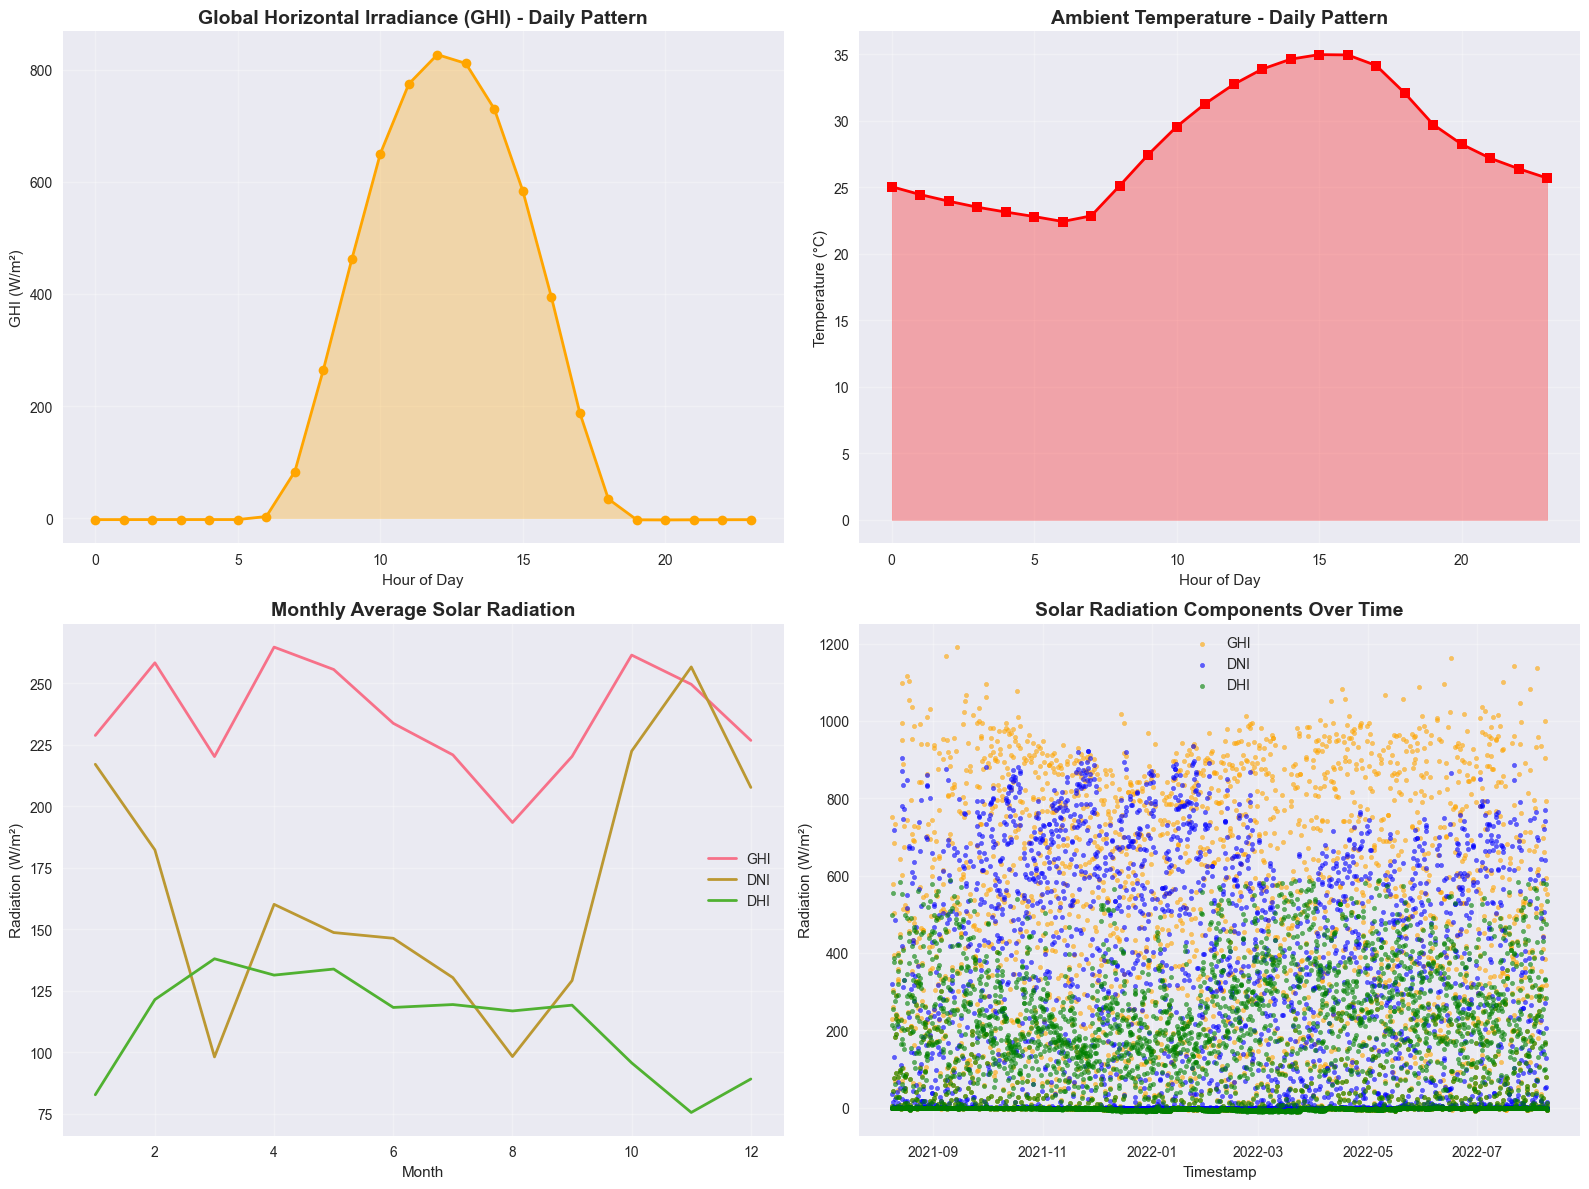

✅ Time series analysis completed!
📊 Key Observations:
   - Peak solar hours typically between 10:00-14:00
   - Temperature follows solar radiation pattern with slight lag
   - Seasonal variations visible in monthly patterns


In [14]:
print("="*60)
print("TIME SERIES ANALYSIS")
print("="*60)

print("📈 Analyzing temporal patterns in solar radiation and temperature...")

# Create subplots for time series analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. GHI over time (daily pattern)
if 'GHI' in df_clean.columns:
    # Daily pattern
    daily_ghi = df_clean.groupby('Hour')['GHI'].mean()
    axes[0,0].plot(daily_ghi.index, daily_ghi.values, color='orange', linewidth=2, marker='o')
    axes[0,0].set_title('Global Horizontal Irradiance (GHI) - Daily Pattern', fontsize=14, fontweight='bold')
    axes[0,0].set_xlabel('Hour of Day')
    axes[0,0].set_ylabel('GHI (W/m²)')
    axes[0,0].grid(True, alpha=0.3)
    axes[0,0].fill_between(daily_ghi.index, daily_ghi.values, alpha=0.3, color='orange')

# 2. Temperature over time
if 'Tamb' in df_clean.columns:
    daily_temp = df_clean.groupby('Hour')['Tamb'].mean()
    axes[0,1].plot(daily_temp.index, daily_temp.values, color='red', linewidth=2, marker='s')
    axes[0,1].set_title('Ambient Temperature - Daily Pattern', fontsize=14, fontweight='bold')
    axes[0,1].set_xlabel('Hour of Day')
    axes[0,1].set_ylabel('Temperature (°C)')
    axes[0,1].grid(True, alpha=0.3)
    axes[0,1].fill_between(daily_temp.index, daily_temp.values, alpha=0.3, color='red')

# 3. Monthly solar radiation patterns
if 'GHI' in df_clean.columns:
    monthly_radiation = df_clean.groupby('Month')[['GHI', 'DNI', 'DHI']].mean()
    monthly_radiation.plot(ax=axes[1,0], linewidth=2)
    axes[1,0].set_title('Monthly Average Solar Radiation', fontsize=14, fontweight='bold')
    axes[1,0].set_xlabel('Month')
    axes[1,0].set_ylabel('Radiation (W/m²)')
    axes[1,0].grid(True, alpha=0.3)
    axes[1,0].legend()

# 4. Radiation comparison
if all(col in df_clean.columns for col in ['GHI', 'DNI', 'DHI']):
    # Sample every 100th point for clarity
    sample_df = df_clean.iloc[::100]
    axes[1,1].scatter(sample_df.index, sample_df['GHI'], alpha=0.6, label='GHI', color='orange', s=10)
    axes[1,1].scatter(sample_df.index, sample_df['DNI'], alpha=0.6, label='DNI', color='blue', s=10)
    axes[1,1].scatter(sample_df.index, sample_df['DHI'], alpha=0.6, label='DHI', color='green', s=10)
    axes[1,1].set_title('Solar Radiation Components Over Time', fontsize=14, fontweight='bold')
    axes[1,1].set_xlabel('Timestamp')
    axes[1,1].set_ylabel('Radiation (W/m²)')
    axes[1,1].legend()
    axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ Time series analysis completed!")
print("📊 Key Observations:")
print("   - Peak solar hours typically between 10:00-14:00")
print("   - Temperature follows solar radiation pattern with slight lag")
print("   - Seasonal variations visible in monthly patterns")

8) Cleaning Impact Analysis

CLEANING IMPACT ANALYSIS
🔧 Analyzing impact of cleaning events on module performance...
📊 Average Module Output by Cleaning Status:


,ModA,ModB
Cleaning,,
0,231.996166,224.654436
1,306.499172,301.341408


📈 Performance Improvement After Cleaning:
   Module A: 32.11%
   Module B: 34.14%


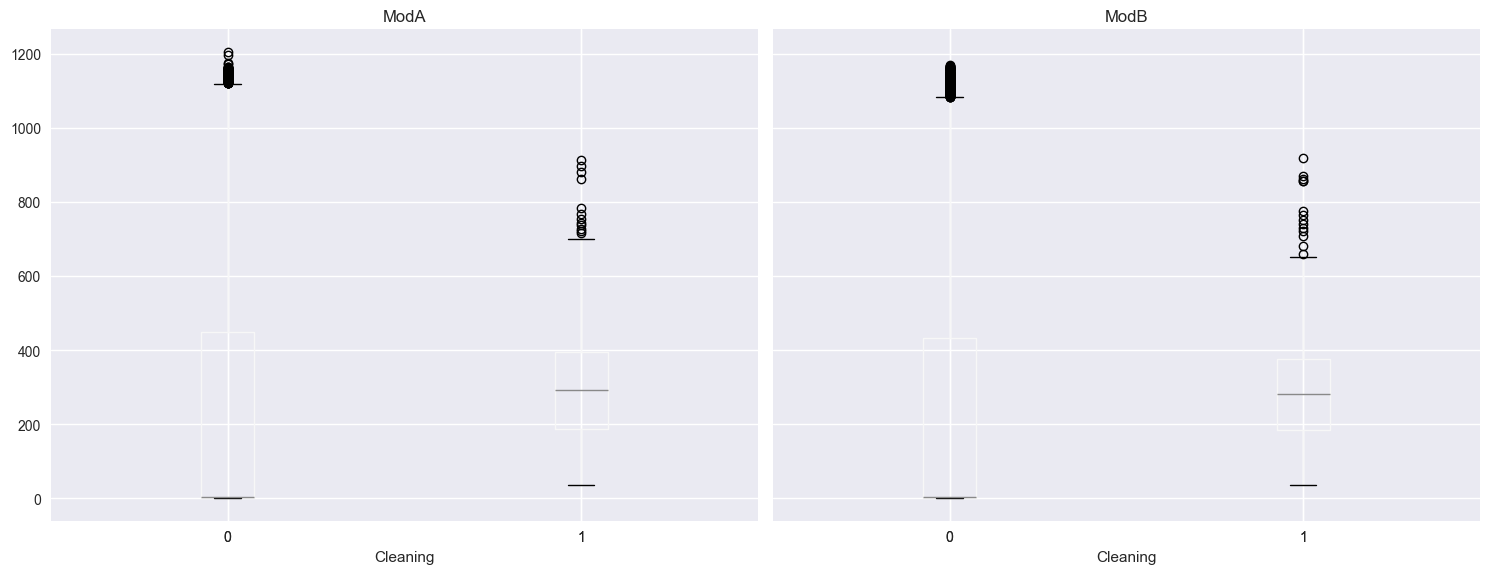

In [16]:
print("="*60)
print("CLEANING IMPACT ANALYSIS")
print("="*60)

if 'Cleaning' in df_clean.columns:
    print("🔧 Analyzing impact of cleaning events on module performance...")
    
    # Calculate average module output before/after cleaning
    cleaning_impact = df_clean.groupby('Cleaning')[['ModA', 'ModB']].mean()
    
    print("📊 Average Module Output by Cleaning Status:")
    display(cleaning_impact)
    
    # Calculate improvement percentage
    if len(cleaning_impact) > 1:
        moda_improvement = ((cleaning_impact.loc[1, 'ModA'] - cleaning_impact.loc[0, 'ModA']) / cleaning_impact.loc[0, 'ModA']) * 100
        modb_improvement = ((cleaning_impact.loc[1, 'ModB'] - cleaning_impact.loc[0, 'ModB']) / cleaning_impact.loc[0, 'ModB']) * 100
        
        print(f"📈 Performance Improvement After Cleaning:")
        print(f"   Module A: {moda_improvement:.2f}%")
        print(f"   Module B: {modb_improvement:.2f}%")
    
    # Visualization
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Bar chart
    cleaning_impact.plot(kind='bar', ax=ax1, color=['skyblue', 'lightcoral'])
    ax1.set_title('Average Module Output: Before vs After Cleaning', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Cleaning Status (0=Before, 1=After)')
    ax1.set_ylabel('Power Output (W/m²)')
    ax1.legend(['Module A', 'Module B'])
    ax1.grid(True, alpha=0.3)
    
    # Box plot for distribution
    df_clean.boxplot(column=['ModA', 'ModB'], by='Cleaning', ax=ax2)
    ax2.set_title('Module Output Distribution by Cleaning Status', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Cleaning Status (0=Before, 1=After)')
    ax2.set_ylabel('Power Output (W/m²)')
    
    plt.suptitle('')  #Remove automatic title
    plt.tight_layout()
    plt.show()
    
else:
    print("⚠️ No 'Cleaning' column found in dataset")

9) Correlation & Relationship Analysis 

CORRELATION & RELATIONSHIP ANALYSIS
📊 Computing correlation matrix...


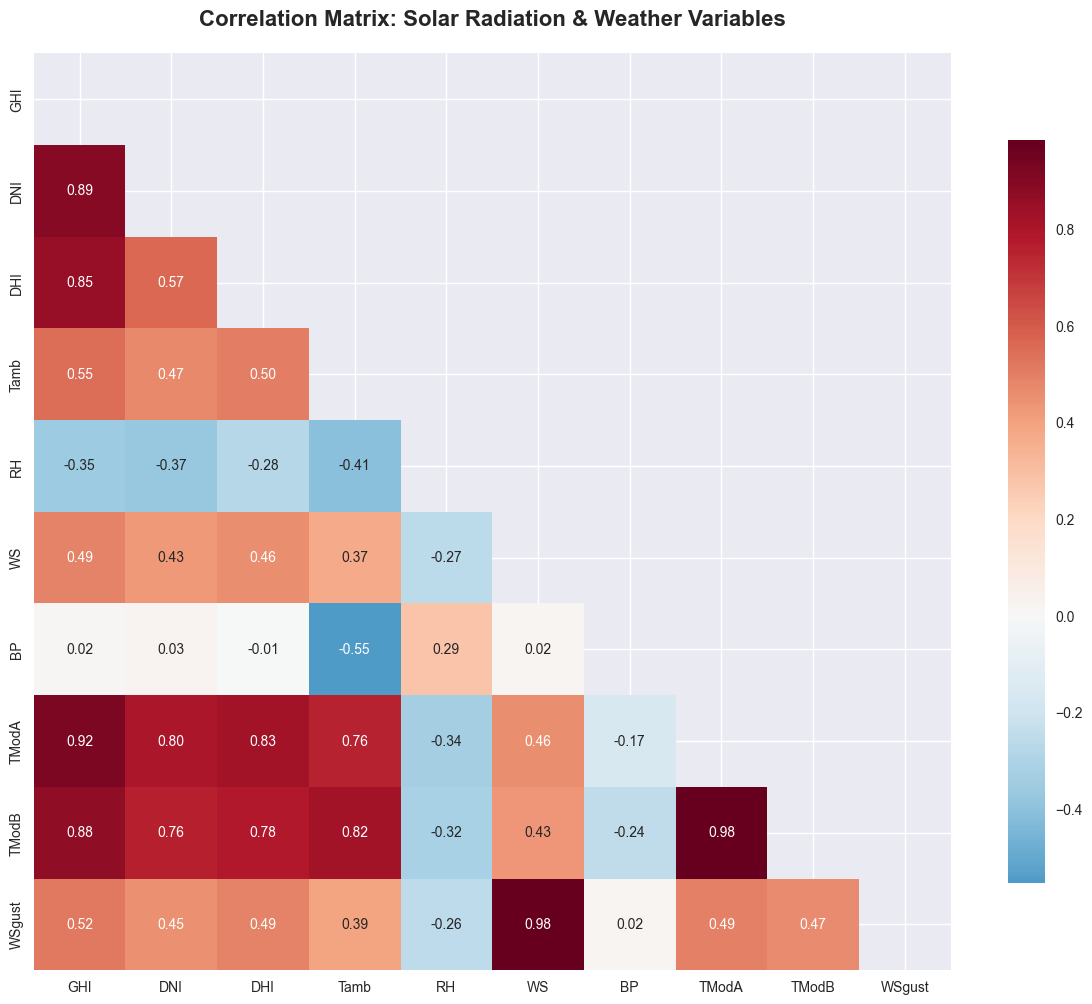

🔍 Key Correlation Insights:
----------------------------
GHI Correlations (Strongest):
   TModA: 0.920 (STRONG positive)
   DNI: 0.891 (STRONG positive)
   TModB: 0.875 (STRONG positive)
   DHI: 0.852 (STRONG positive)
   Tamb: 0.545 (MODERATE positive)
   WSgust: 0.518 (MODERATE positive)
   WS: 0.486 (WEAK positive)
   RH: -0.353 (WEAK negative)

📈 Creating scatter plots for key relationships...


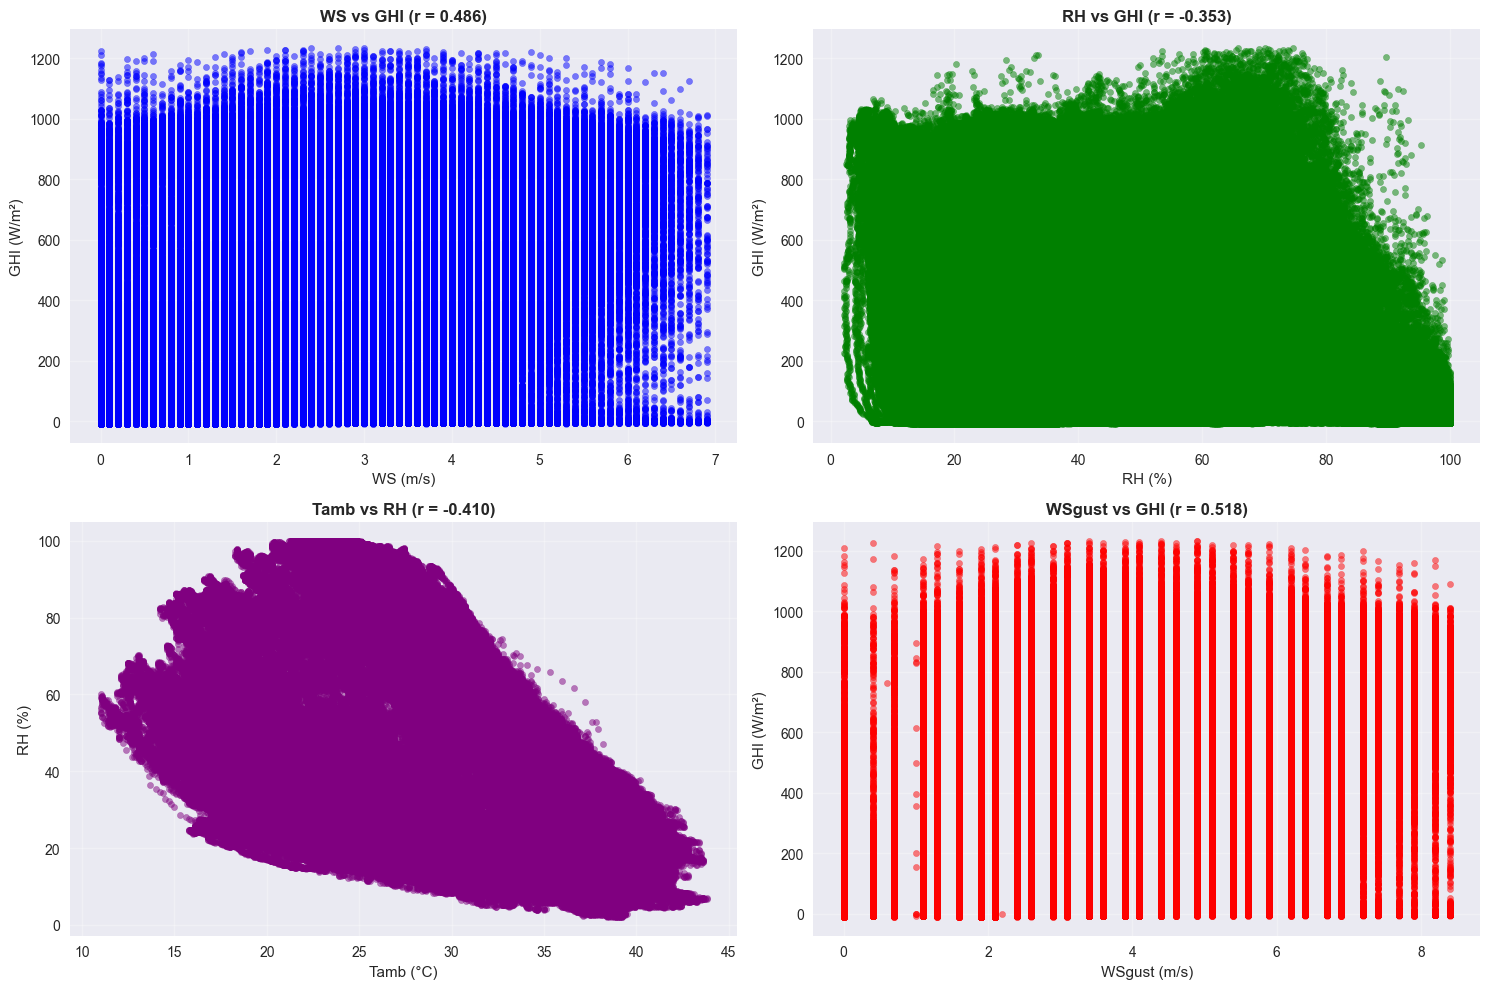

✅ Created 4 scatter plots successfully!
✅ Correlation analysis completed!


In [21]:
print("="*60)
print("CORRELATION & RELATIONSHIP ANALYSIS")
print("="*60)

# Helper function for units - DEFINED FIRST
def get_units(column_name):
    """Return units for column names"""
    units_map = {
        'GHI': 'W/m²', 'DNI': 'W/m²', 'DHI': 'W/m²', 
        'ModA': 'W/m²', 'ModB': 'W/m²',
        'Tamb': '°C', 'TModA': '°C', 'TModB': '°C',
        'RH': '%', 'WS': 'm/s', 'WSgust': 'm/s', 'BP': 'hPa',
        'WD': '°N', 'Precipitation': 'mm/min'
    }
    return units_map.get(column_name, '')

# Select key variables for correlation analysis
corr_vars = ['GHI', 'DNI', 'DHI', 'Tamb', 'RH', 'WS', 'BP', 'TModA', 'TModB', 'WSgust']
available_vars = [var for var in corr_vars if var in df_clean.columns]

print("📊 Computing correlation matrix...")
corr_matrix = df_clean[available_vars].corr()

# Create heatmap
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  # Mask upper triangle
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='RdBu_r', center=0, 
            square=True, fmt='.2f', cbar_kws={'shrink': 0.8}, 
            annot_kws={'size': 10})
plt.title('Correlation Matrix: Solar Radiation & Weather Variables', 
          fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("🔍 Key Correlation Insights:")
print("----------------------------")
if 'GHI' in corr_matrix.columns:
    ghi_correlations = corr_matrix['GHI'].sort_values(ascending=False)
    print("GHI Correlations (Strongest):")
    for var, corr in ghi_correlations.items():
        if var != 'GHI' and abs(corr) > 0.3:  # Only show meaningful correlations
            strength = "STRONG" if abs(corr) > 0.7 else "MODERATE" if abs(corr) > 0.5 else "WEAK"
            direction = "positive" if corr > 0 else "negative"
            print(f"   {var}: {corr:.3f} ({strength} {direction})")

# Scatter plots for relationships
print("\n📈 Creating scatter plots for key relationships...")

# Determine how many subplots we need
available_plots = []
plot_configs = [
    ('WS', 'GHI', 'blue'),
    ('RH', 'GHI', 'green'), 
    ('Tamb', 'RH', 'purple'),
    ('WSgust', 'GHI', 'red')
]

for x_col, y_col, color in plot_configs:
    if all(col in df_clean.columns for col in [x_col, y_col]):
        available_plots.append((x_col, y_col, color))

# Create appropriate subplot grid
n_plots = len(available_plots)
if n_plots > 0:
    n_rows = (n_plots + 1) // 2  # Calculate rows needed
    fig, axes = plt.subplots(n_rows, 2, figsize=(15, 5 * n_rows))
    
    # Flatten axes for easy indexing
    if n_rows > 1:
        axes = axes.ravel()
    else:
        axes = [axes] if n_plots == 1 else axes
    
    for i, (x_col, y_col, color) in enumerate(available_plots):
        if i < len(axes):
            # Safe correlation access with error handling
            try:
                corr_value = corr_matrix.loc[x_col, y_col]
                title_suffix = f'(r = {corr_value:.3f})'
            except KeyError:
                title_suffix = '(correlation not available)'
            
            axes[i].scatter(df_clean[x_col], df_clean[y_col], alpha=0.5, color=color, s=20)
            axes[i].set_xlabel(f'{x_col} ({get_units(x_col)})')
            axes[i].set_ylabel(f'{y_col} ({get_units(y_col)})')
            axes[i].set_title(f'{x_col} vs {y_col} {title_suffix}', fontweight='bold')
            axes[i].grid(True, alpha=0.3)
    
    # Remove empty subplots
    for i in range(len(available_plots), len(axes)):
        fig.delaxes(axes[i])
    
    plt.tight_layout()
    plt.show()
    
    print(f"✅ Created {n_plots} scatter plots successfully!")
else:
    print("⚠️ No suitable column pairs available for scatter plots")

print("✅ Correlation analysis completed!")

10) Wind & Distribution Analysis 

WIND & DISTRIBUTION ANALYSIS
📊 Creating distribution plots...


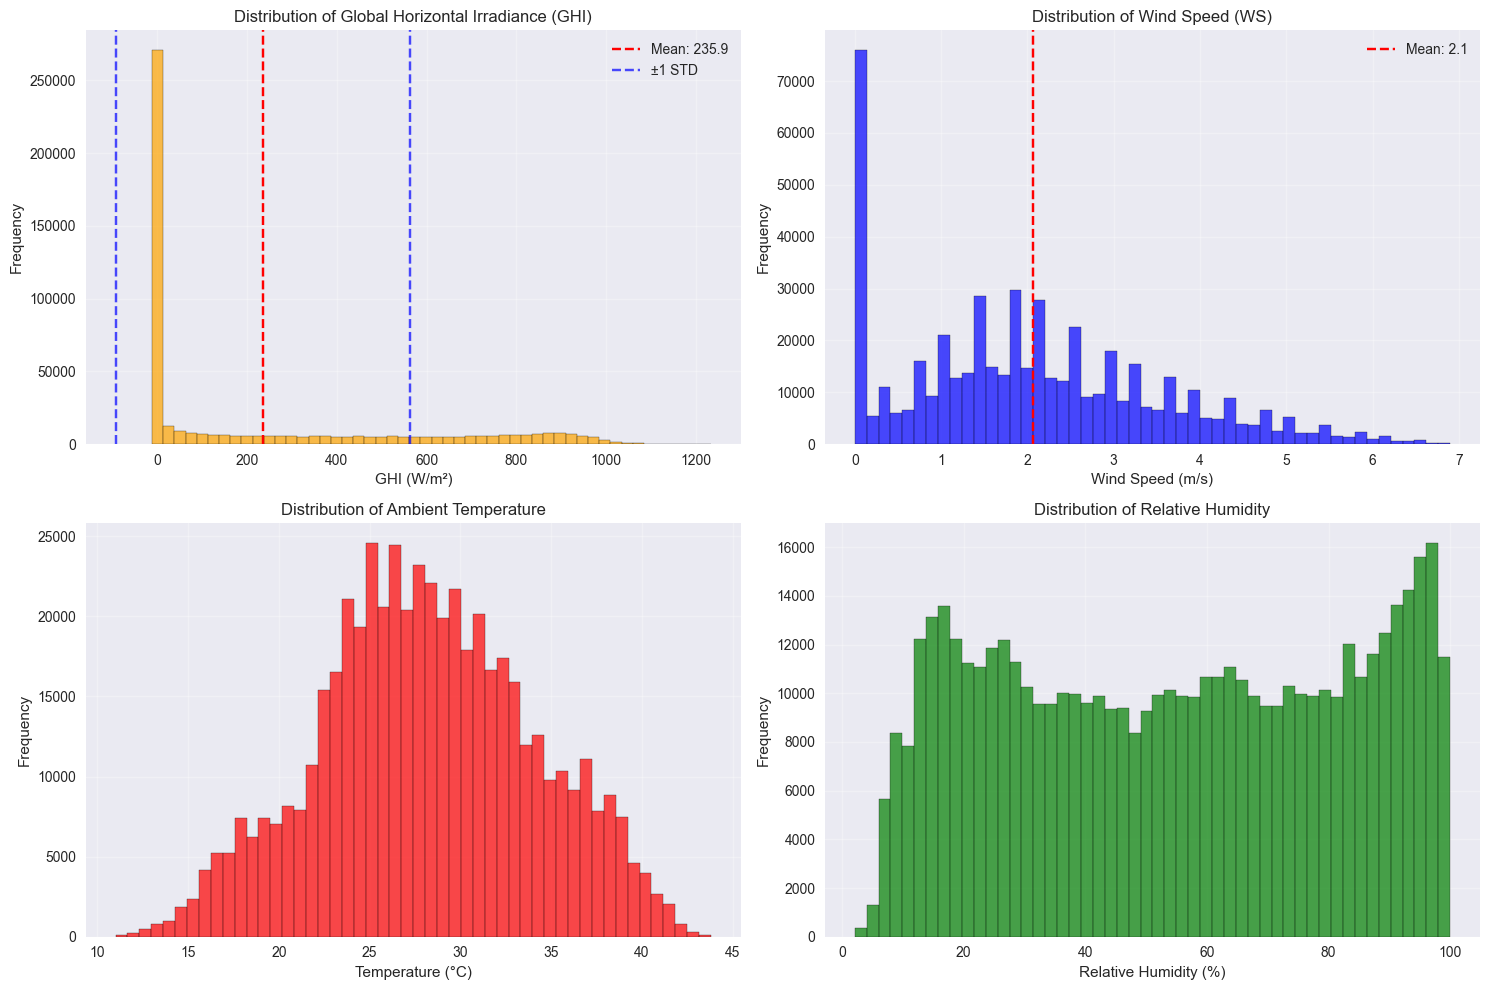

✅ Distribution analysis completed!


In [22]:
print("="*60)
print("WIND & DISTRIBUTION ANALYSIS")
print("="*60)

# Histograms for GHI and WS
print("📊 Creating distribution plots...")
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. GHI Histogram
if 'GHI' in df_clean.columns:
    axes[0,0].hist(df_clean['GHI'], bins=50, color='orange', alpha=0.7, edgecolor='black')
    axes[0,0].set_xlabel('GHI (W/m²)')
    axes[0,0].set_ylabel('Frequency')
    axes[0,0].set_title('Distribution of Global Horizontal Irradiance (GHI)')
    axes[0,0].grid(True, alpha=0.3)
    
    # Add statistics
    ghi_mean = df_clean['GHI'].mean()
    ghi_std = df_clean['GHI'].std()
    axes[0,0].axvline(ghi_mean, color='red', linestyle='--', label=f'Mean: {ghi_mean:.1f}')
    axes[0,0].axvline(ghi_mean + ghi_std, color='blue', linestyle='--', alpha=0.7, label=f'±1 STD')
    axes[0,0].axvline(ghi_mean - ghi_std, color='blue', linestyle='--', alpha=0.7)
    axes[0,0].legend()

# 2. WS Histogram
if 'WS' in df_clean.columns:
    axes[0,1].hist(df_clean['WS'], bins=50, color='blue', alpha=0.7, edgecolor='black')
    axes[0,1].set_xlabel('Wind Speed (m/s)')
    axes[0,1].set_ylabel('Frequency')
    axes[0,1].set_title('Distribution of Wind Speed (WS)')
    axes[0,1].grid(True, alpha=0.3)
    
    ws_mean = df_clean['WS'].mean()
    ws_std = df_clean['WS'].std()
    axes[0,1].axvline(ws_mean, color='red', linestyle='--', label=f'Mean: {ws_mean:.1f}')
    axes[0,1].legend()

# 3. Temperature Histogram
if 'Tamb' in df_clean.columns:
    axes[1,0].hist(df_clean['Tamb'], bins=50, color='red', alpha=0.7, edgecolor='black')
    axes[1,0].set_xlabel('Temperature (°C)')
    axes[1,0].set_ylabel('Frequency')
    axes[1,0].set_title('Distribution of Ambient Temperature')
    axes[1,0].grid(True, alpha=0.3)

# 4. RH Histogram
if 'RH' in df_clean.columns:
    axes[1,1].hist(df_clean['RH'], bins=50, color='green', alpha=0.7, edgecolor='black')
    axes[1,1].set_xlabel('Relative Humidity (%)')
    axes[1,1].set_ylabel('Frequency')
    axes[1,1].set_title('Distribution of Relative Humidity')
    axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ Distribution analysis completed!")

11) Temperature Analysis

TEMPERATURE ANALYSIS
🌡️ Examining temperature relationships with humidity and solar radiation...


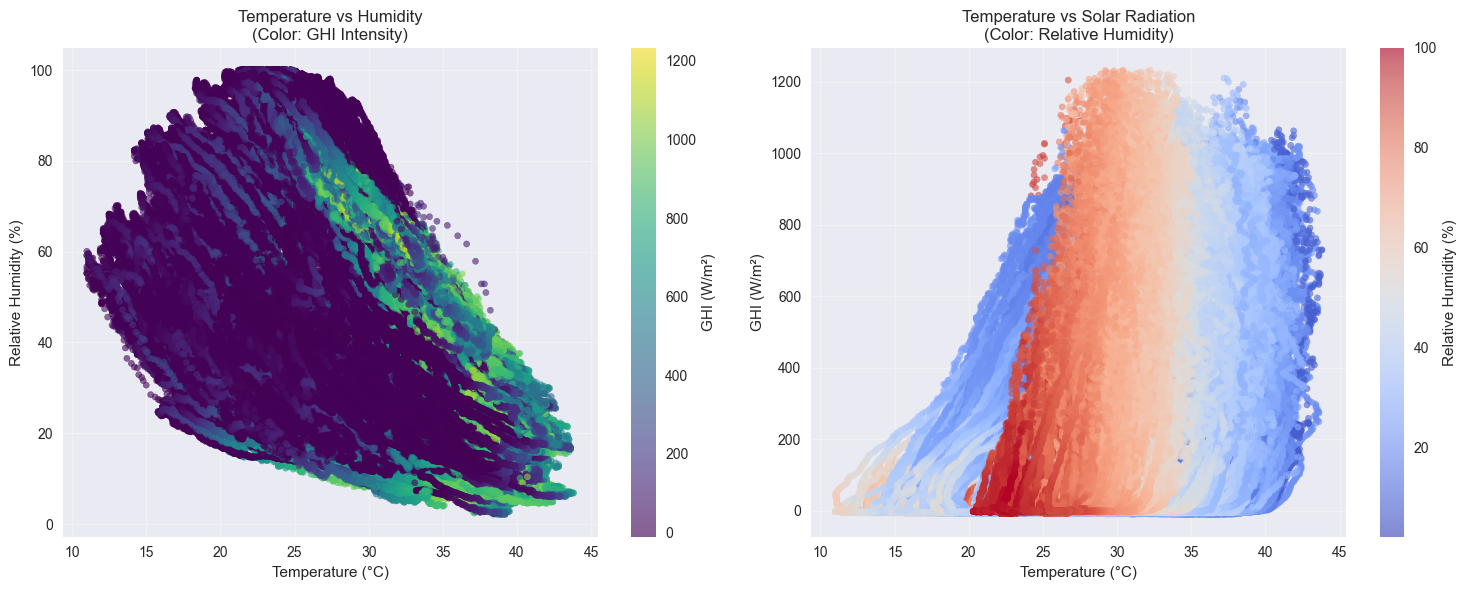

📊 Temperature-Humidity Insights:
   Temperature vs Humidity correlation: -0.410
   Temperature vs GHI correlation: 0.545
   💡 Strong positive correlation: Higher temperatures associated with higher solar radiation


In [23]:
print("="*60)
print("TEMPERATURE ANALYSIS")
print("="*60)

print("🌡️ Examining temperature relationships with humidity and solar radiation...")

if all(col in df_clean.columns for col in ['Tamb', 'RH', 'GHI']):
    # Create subplots
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    # 1. Temperature vs Humidity with GHI as color
    scatter1 = axes[0].scatter(df_clean['Tamb'], df_clean['RH'], c=df_clean['GHI'], 
                              cmap='viridis', alpha=0.6, s=20)
    axes[0].set_xlabel('Temperature (°C)')
    axes[0].set_ylabel('Relative Humidity (%)')
    axes[0].set_title('Temperature vs Humidity\n(Color: GHI Intensity)')
    plt.colorbar(scatter1, ax=axes[0], label='GHI (W/m²)')
    axes[0].grid(True, alpha=0.3)
    
    # 2. Temperature vs GHI with RH as color
    scatter2 = axes[1].scatter(df_clean['Tamb'], df_clean['GHI'], c=df_clean['RH'], 
                              cmap='coolwarm', alpha=0.6, s=20)
    axes[1].set_xlabel('Temperature (°C)')
    axes[1].set_ylabel('GHI (W/m²)')
    axes[1].set_title('Temperature vs Solar Radiation\n(Color: Relative Humidity)')
    plt.colorbar(scatter2, ax=axes[1], label='Relative Humidity (%)')
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print("📊 Temperature-Humidity Insights:")
    temp_rh_corr = df_clean['Tamb'].corr(df_clean['RH'])
    temp_ghi_corr = df_clean['Tamb'].corr(df_clean['GHI'])
    print(f"   Temperature vs Humidity correlation: {temp_rh_corr:.3f}")
    print(f"   Temperature vs GHI correlation: {temp_ghi_corr:.3f}")
    
    if temp_rh_corr < -0.5:
        print("   💡 Strong negative correlation: Higher temperatures associated with lower humidity")
    if temp_ghi_corr > 0.5:
        print("   💡 Strong positive correlation: Higher temperatures associated with higher solar radiation")
else:
    print("⚠️ Required columns (Tamb, RH, GHI) not available for temperature analysis")

12) Bubble Chart 

BUBBLE CHART ANALYSIS
🫧 Creating bubble chart: GHI vs Temperature (bubble size = RH)...


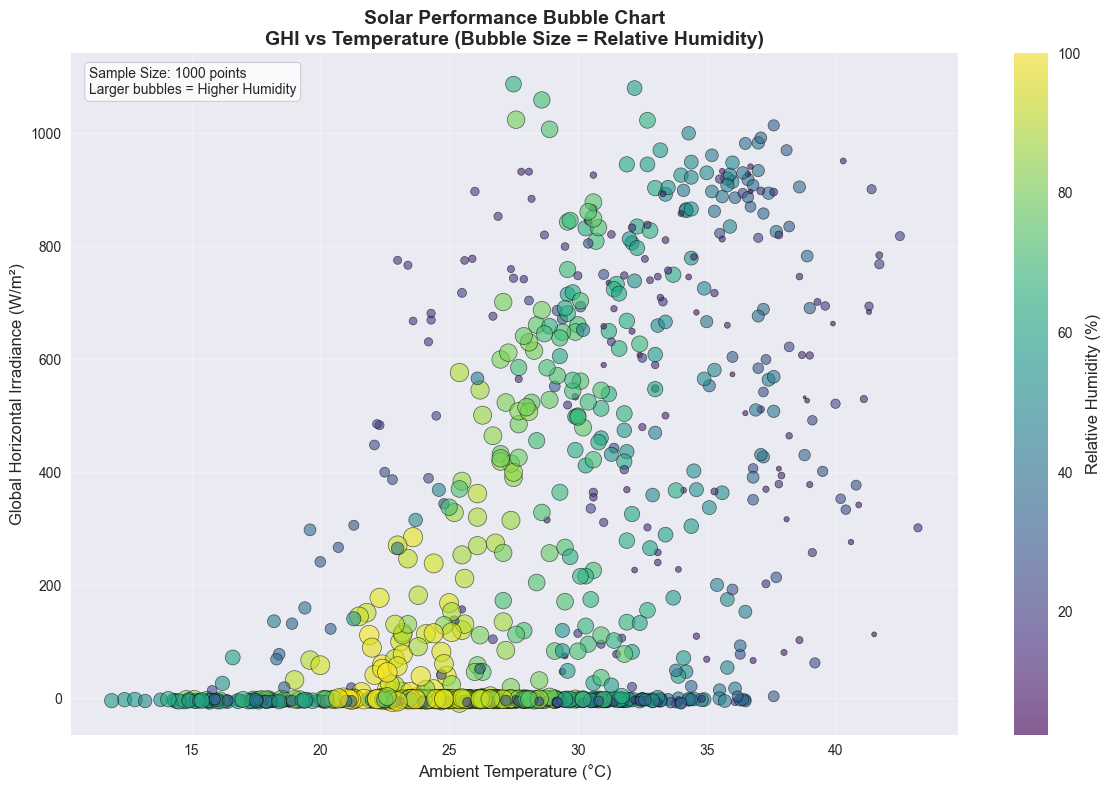

✅ Bubble chart created successfully!
💡 Interpretation:
   - Larger bubbles indicate higher humidity conditions
   - Color intensity also represents humidity levels
   - Patterns show relationship between temperature, solar radiation, and humidity


In [24]:
print("="*60)
print("BUBBLE CHART ANALYSIS")
print("="*60)

print("🫧 Creating bubble chart: GHI vs Temperature (bubble size = RH)...")

if all(col in df_clean.columns for col in ['GHI', 'Tamb', 'RH']):
    # Sample data for better visualization (every 10th point)
    sample_size = min(1000, len(df_clean))
    sample_df = df_clean.sample(n=sample_size, random_state=42) if len(df_clean) > 1000 else df_clean
    
    plt.figure(figsize=(12, 8))
    scatter = plt.scatter(sample_df['Tamb'], sample_df['GHI'], 
                         s=sample_df['RH']*2,  # Scale bubble size
                         c=sample_df['RH'],     # Color by RH
                         cmap='viridis', 
                         alpha=0.6, 
                         edgecolors='black', 
                         linewidth=0.5)
    
    plt.xlabel('Ambient Temperature (°C)', fontsize=12)
    plt.ylabel('Global Horizontal Irradiance (W/m²)', fontsize=12)
    plt.title('Solar Performance Bubble Chart\nGHI vs Temperature (Bubble Size = Relative Humidity)', 
              fontsize=14, fontweight='bold')
    
    # Add colorbar
    cbar = plt.colorbar(scatter)
    cbar.set_label('Relative Humidity (%)', fontsize=12)
    
    # Add grid
    plt.grid(True, alpha=0.3)
    
    # Add statistics annotation
    plt.annotate(f'Sample Size: {len(sample_df)} points\nLarger bubbles = Higher Humidity', 
                xy=(0.02, 0.98), xycoords='axes fraction', 
                bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8),
                verticalalignment='top', fontsize=10)
    
    plt.tight_layout()
    plt.show()
    
    print("✅ Bubble chart created successfully!")
    print("💡 Interpretation:")
    print("   - Larger bubbles indicate higher humidity conditions")
    print("   - Color intensity also represents humidity levels")
    print("   - Patterns show relationship between temperature, solar radiation, and humidity")
else:
    print("⚠️ Required columns (GHI, Tamb, RH) not available for bubble chart")

13) Final Export & Summary 

In [25]:
print("="*60)
print("FINAL DATA EXPORT & SUMMARY")
print("="*60)

# Final export of cleaned data
df_clean.to_csv('../data/benin_clean.csv', index=True)
print("💾 FINAL CLEANED DATA EXPORTED:")
print(f"   File: data/benin_clean.csv")
print(f"   Rows: {len(df_clean)}")
print(f"   Columns: {len(df_clean.columns)}")
print(f"   Size: {df_clean.memory_usage(deep=True).sum() / 1024 / 1024:.2f} MB")

print("\n📊 CLEANING SUMMARY:")
print(f"   Original dataset: {len(df)} rows")
print(f"   Cleaned dataset: {len(df_clean)} rows")
print(f"   Data retention: {(len(df_clean)/len(df))*100:.2f}%")
print(f"   Missing values handled: {df.isnull().sum().sum() - df_clean.isnull().sum().sum()}")

print("\n✅ BENIN EDA COMPLETED SUCCESSFULLY!")
print("   Ready for cross-country comparison in Task 3")

FINAL DATA EXPORT & SUMMARY
💾 FINAL CLEANED DATA EXPORTED:
   File: data/benin_clean.csv
   Rows: 517232
   Columns: 22
   Size: 82.87 MB

📊 CLEANING SUMMARY:
   Original dataset: 525600 rows
   Cleaned dataset: 517232 rows
   Data retention: 98.41%
   Missing values handled: 8368

✅ BENIN EDA COMPLETED SUCCESSFULLY!
   Ready for cross-country comparison in Task 3
